In [1]:
from nico import Annotations as sann
from nico import Interactions as sint
from nico import Covariations as scov

#import Annotations as sann
#import Interactions as sint
#import Covariations as scov

#import scanpy as sc
#import gseapy
#import xlsxwriter

#import numpy as np
#import time
#import os

import matplotlib


In [2]:
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['axes.linewidth'] = 0.1 #set the value globally

import matplotlib.pyplot as plt
plt.rc('font', family='Helvetica')

In [3]:
# For details of the function usage and input parameters either refer to the documentation or 
# just write the function and add .__doc__ to retrieve infromation on all relelvant parameters.

#print(sann.find_anchor_cells_between_ref_and_query.__doc__)
#print(sint.spatial_neighborhood_analysis.__doc__)
#print(scov.gene_covariation_analysis.__doc__)


In [4]:
# All the figures will be saved in PDF format as vector graphics by default. 
# For every function that generates  figures, the following default parameters are used: 
# transparent_mode=False, saveas='pdf',showit=True, dpi=300 

# For saving figures in png format, set saveas='png' 
# For generating images without background, set transparent_mode=True
# If figure output within the Jupyter Notebook is not desired, set showit=False

In [5]:
# Please download the sample data from the git repository https://github.com/ankitbioinfo/nico_tutorial and keep all the files and folders in 
# the same directory to complete the tutorial. 

# inputRef  (single-cell RNA-sequencing data) 
# inputQuery (single-cell resolution spatial transcriptomics data)
# NiCoLRdb.txt (Ligand-receptor database file) 

# Before running the Perform_spatial_analysis.ipynb notebook, input data need to be prepared by running 
# the Start_Data_preparation_for_niche_analysis.ipynb notebook
# Once all the steps of Start_Data_preparation_for_niche_analysis.ipynb are completed, 
# the following commands can be executed to run a complete NiCo aanlysis. 

# Perform cell type annotation of spatial data 

In [6]:
# Find anchored cells between two modalities 
anchors_and_neighbors_info=sann.find_anchor_cells_between_ref_and_query()


In [7]:
# perform NiCo cell type annotation using the spatial Leiden clusters from  the Start_Data_preparation_for_niche_analysis.ipynb notebook, 
# e.g., with resolution parameter 0.4 
# To inspect cell type cluster changes with different parameters, save the inputQuery/MNN_based_annotations in other locations 
# or delete the directory manually. 

output_info=sann.nico_based_annotation(anchors_and_neighbors_info,
guiding_spatial_cluster_resolution_tag='leiden0.4',
across_spatial_clusters_dispersion_cutoff=0.15,
resolved_tie_issue_with_weighted_nearest_neighbor='No')

In [8]:
# This command will delete the anchored file details created in the find_anchor_cells_between_ref_and_query step. 
# To perform annotations with several different resolution parameters, do not delete this file, since anchor 
# information is independent of the resolution parameter. 
sann.delete_files(output_info)

The figures are saved:  ./inputQuery/MNN_based_annotations/visualize_anchors.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


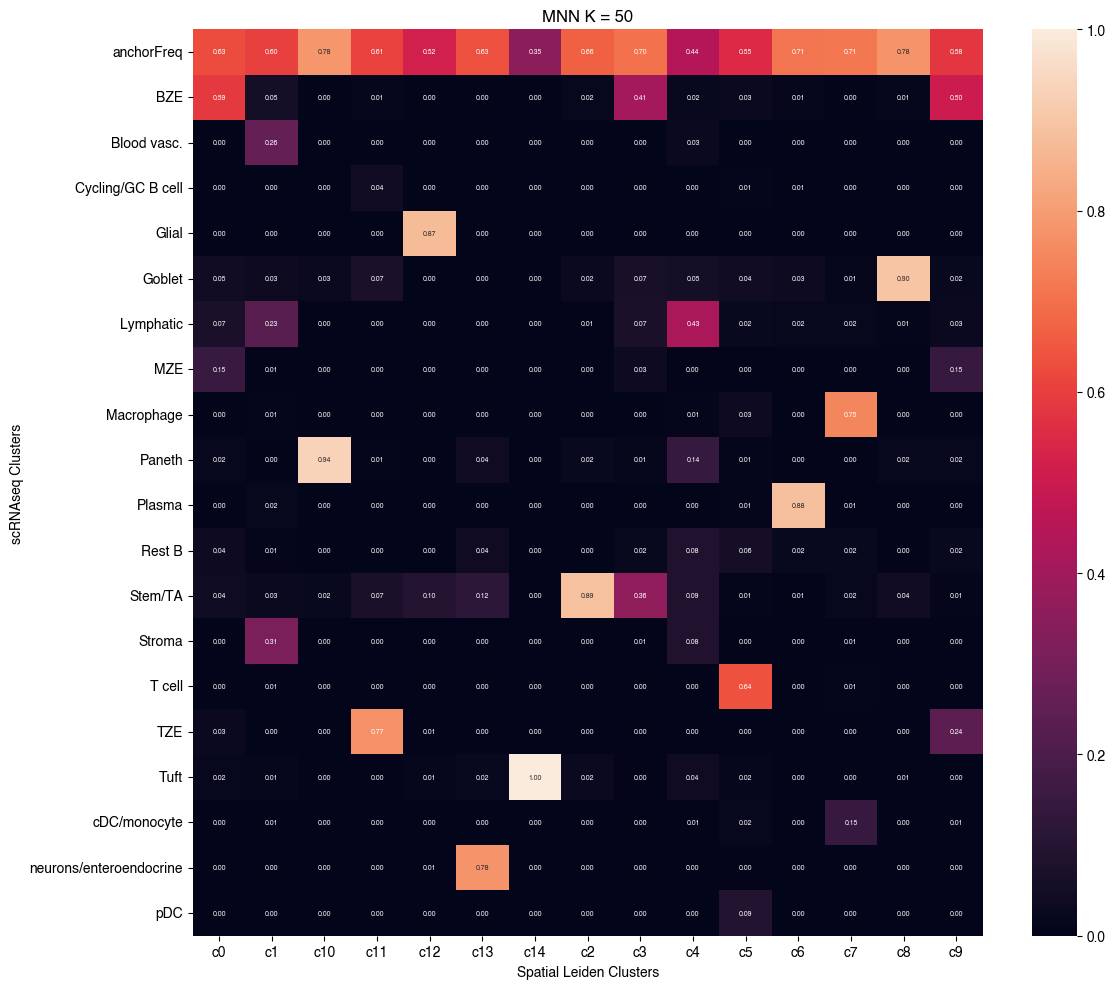

In [9]:
# Visualize the anchor cells between two modalities. 

sann.visualize_spatial_anchored_cell_mapped_to_scRNAseq(output_info)

The figures are saved:  ./inputQuery/MNN_based_annotations/tissue_and_umap_with_all_celltype_annotations.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


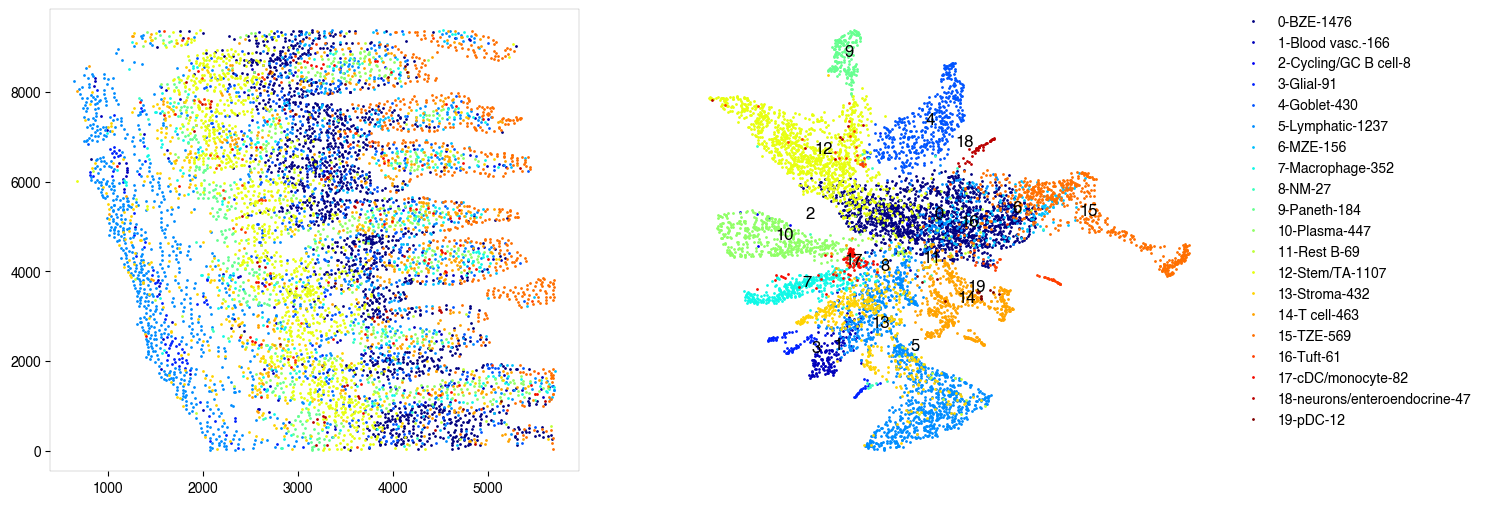

In [10]:
# Visualize the spatial annotations of all cell types simultaneously
# Left side: tissue map
# Right side: UMAP 
sann.visualize_umap_and_cell_coordinates_with_all_celltypes()

The figures are saved:  ./inputQuery/MNN_based_annotations/fig_individual_annotation/Stem_TA0.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./inputQuery/MNN_based_annotations/fig_individual_annotation/Paneth1.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


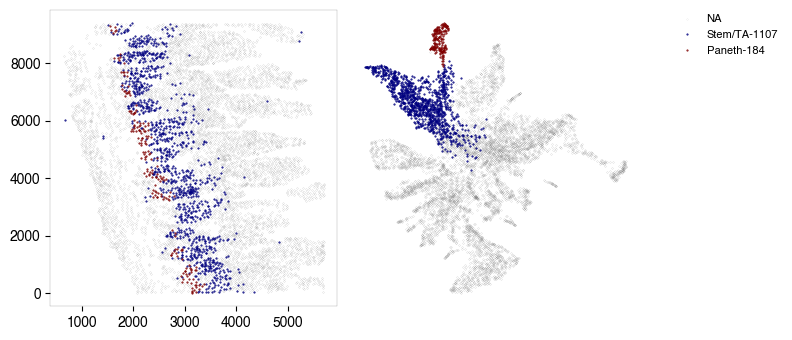

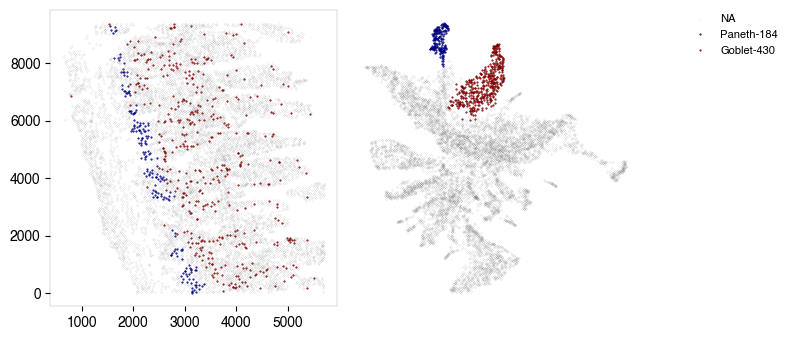

In [11]:
# Visualize  spatial annotations of selected pairs (or larger sets) of cell types  
# Left side: tissue map
# Right side: UMAP 

choose_celltypes=[['Stem/TA','Paneth'],['Paneth','Goblet']]
sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=choose_celltypes)

In [12]:
# For visualizing every cell type individually, leave list choose_celltypes empty.  
 
#sann.visualize_umap_and_cell_coordinates_with_selected_celltypes(choose_celltypes=[])

# Infer significant niche cell type interactions 

In [13]:
# Perform  neighborhood analysis across direct neighbors (juxtacrine signaling, R=0) of the central niche cell type.   
# To exclude cell types from the neighborhood analysis, add celltype names to the list removed_CTs_before_finding_CT_CT_interactions.
# In the example below, the cell types NM, Basophils, Cycling/GC B cell, and pDC, would not be included. 

niche_pred_output=sint.spatial_neighborhood_analysis(Radius=0,
removed_CTs_before_finding_CT_CT_interactions=['NM','Basophils','Cycling/GC B cell','pDC'])

average neighbors: 4.850590310761297
data shape (7340, 19) (7340,) neighbor shape (7340, 17)
Searching hyperparameters  Grid method: 0.0009765625
Searching hyperparameters  Grid method: 0.001953125
Searching hyperparameters  Grid method: 0.001953125
Inverse of lambda regularization found 0.001953125
training (5872, 17) testing (1468, 17) coeff (17, 17)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/TopCoeff_R0/Rank1_Paneth.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/TopCoeff_R0/Rank3_Stem_TA.pdf


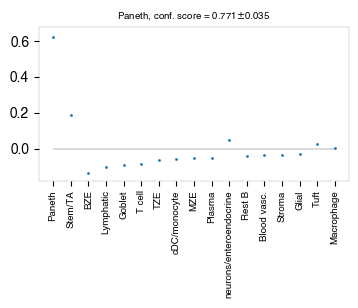

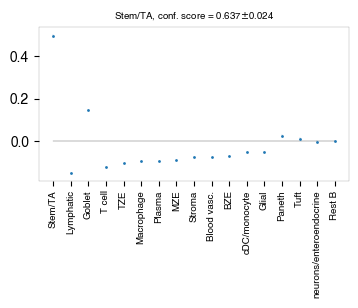

In [14]:
# Order niche cell types by magnitude of regression coefficients, add celltype names to the list argument 
# choose_celltypes, e.g., for the Stem/TA and Paneth cell niche. 

sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=['Stem/TA','Paneth'])

In [15]:
# If niche cell types from the niche neighborhood of all cell types should be ordered, 
# then leave list argument choose_celltypes empty. 

#sint.find_interacting_cell_types(niche_pred_output,choose_celltypes=[])

The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/ROC_R0.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


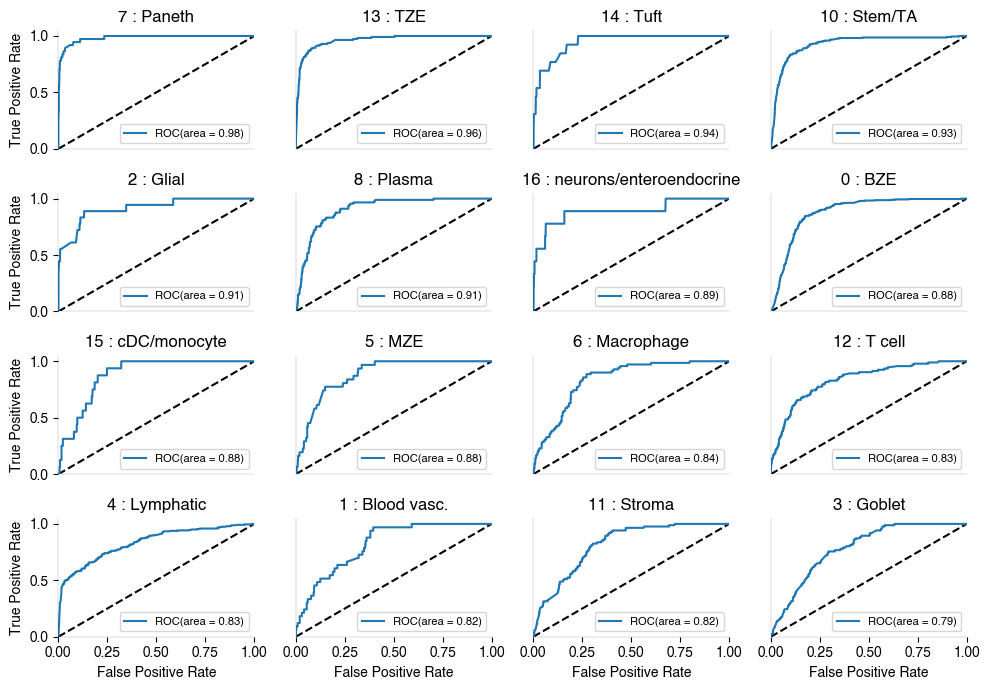

In [16]:
# Plot the ROC curve of the classifier prediction for one of the crossfolds. 

sint.plot_roc_results(niche_pred_output)

The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/Confusing_matrix_R0.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


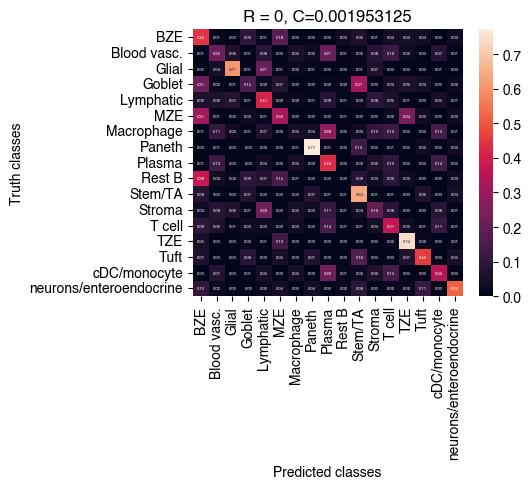

In [17]:
# Plot the average confusion matrix of the classifier from cross-folds 

sint.plot_confusion_matrix(niche_pred_output)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/weight_matrix_R0.pdf


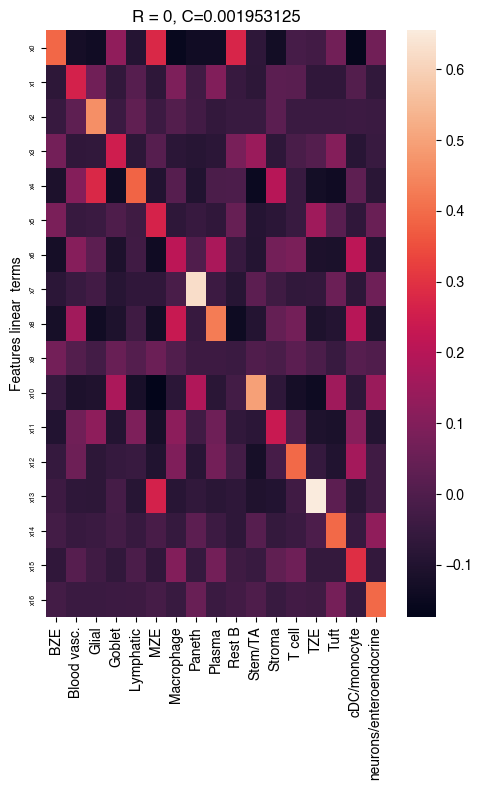

In [18]:
# Plot the average coefficient matrix of the classifier from cross-folds 

sint.plot_coefficient_matrix(niche_pred_output)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/scores_0.pdf


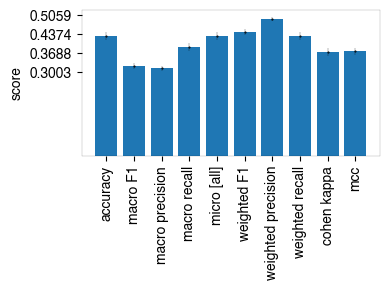

In [19]:
# Plot the evaluation score of the classifier for different metrics 
sint.plot_evaluation_scores(niche_pred_output, figsize=(4,3))

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/Niche_interactions_without_edge_weights_R0.pdf


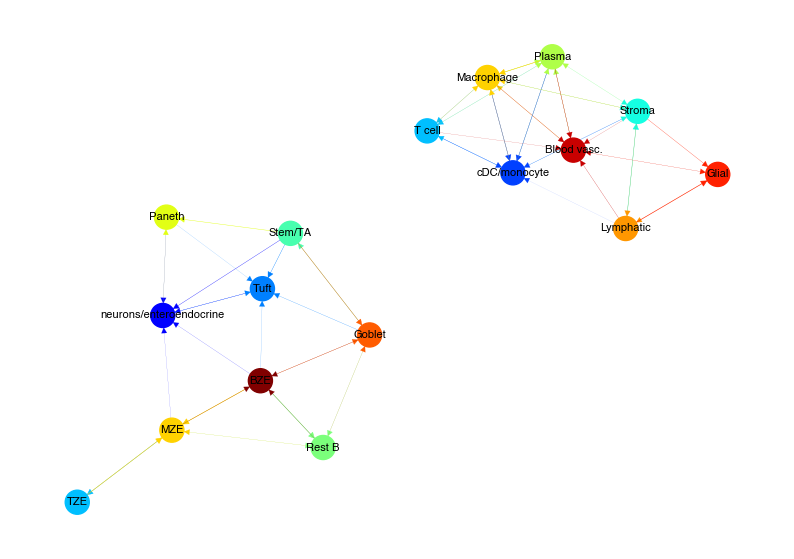

In [20]:
# Plot the niche interaction network without any edge weight details for cutoff 0.1 

sint.plot_niche_interactions_without_edge_weight(niche_pred_output,niche_cutoff=0.04)


The figures are saved:  ./spatial_ct_ct_interactions/niche_prediction_linear/Niche_interactions_with_edge_weights_R0.pdf


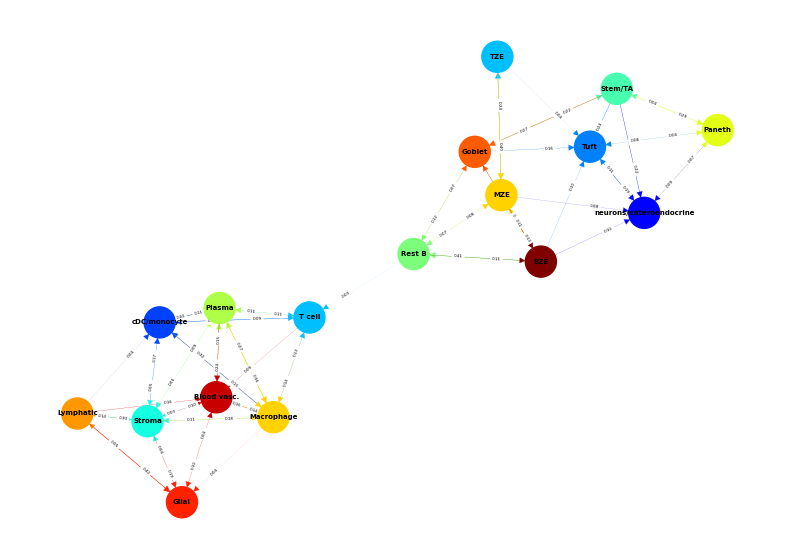

In [21]:
# Plot the niche interaction network with edge weight details for cutoff 0.03

sint.plot_niche_interactions_with_edge_weight(niche_pred_output,niche_cutoff=0.03)


# Perform niche cell state covariation analysis using latent factors

In [22]:
# Infer desired number of latent factors (e.g., no_of_factors=3) for each cell type from both modalities using 
# integrated non-negative matrix factorization. 
# Set iNMFmode=False for appling the conventional non-negative matrix factorization method. In this case, latent factors 
# will be derived from the scRNA-seq data and transfered to the spatial modality. 
# This option is preferable if spatial data are affected by substantial technical noise due to unspecific background signal
# or gene expression spill-over between neighboring cell types due to imperfect segmentation.

# NiCoLRdb.txt is the name of the ligand-receptor database file. Users can use databases of similar format from any resource. 
# NiCoLRdb.txt was created by merging ligand-receptor pairs from NATMI, OMNIPATH, and CellPhoneDB. 

all_output_data=scov.gene_covariation_analysis(iNMFmode=True,Radius=0,no_of_factors=3,LRdbFilename='NiCoLRdb.txt')



 Spatial and scRNA-seq number of clusters, respectively  17 19
Common cell types between spatial and scRNA-seq data   17 {'Goblet', 'MZE', 'Paneth', 'Plasma', 'TZE', 'Macrophage', 'Stem/TA', 'Blood vasc.', 'Stroma', 'cDC/monocyte', 'neurons/enteroendocrine', 'Glial', 'T cell', 'Lymphatic', 'Rest B', 'BZE', 'Tuft'}

The spatial cluster name does not match the scRNA-seq cluster name  set()
If the above answer is Null, then everything is okay. However, if any spatial cell type does not exist in the scRNA-seq data, please correct this manually; otherwise, NiCo will not run. 





cell types found  ['Paneth']
These figures are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/NMF_output/
The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/NMF_output/Paneth.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


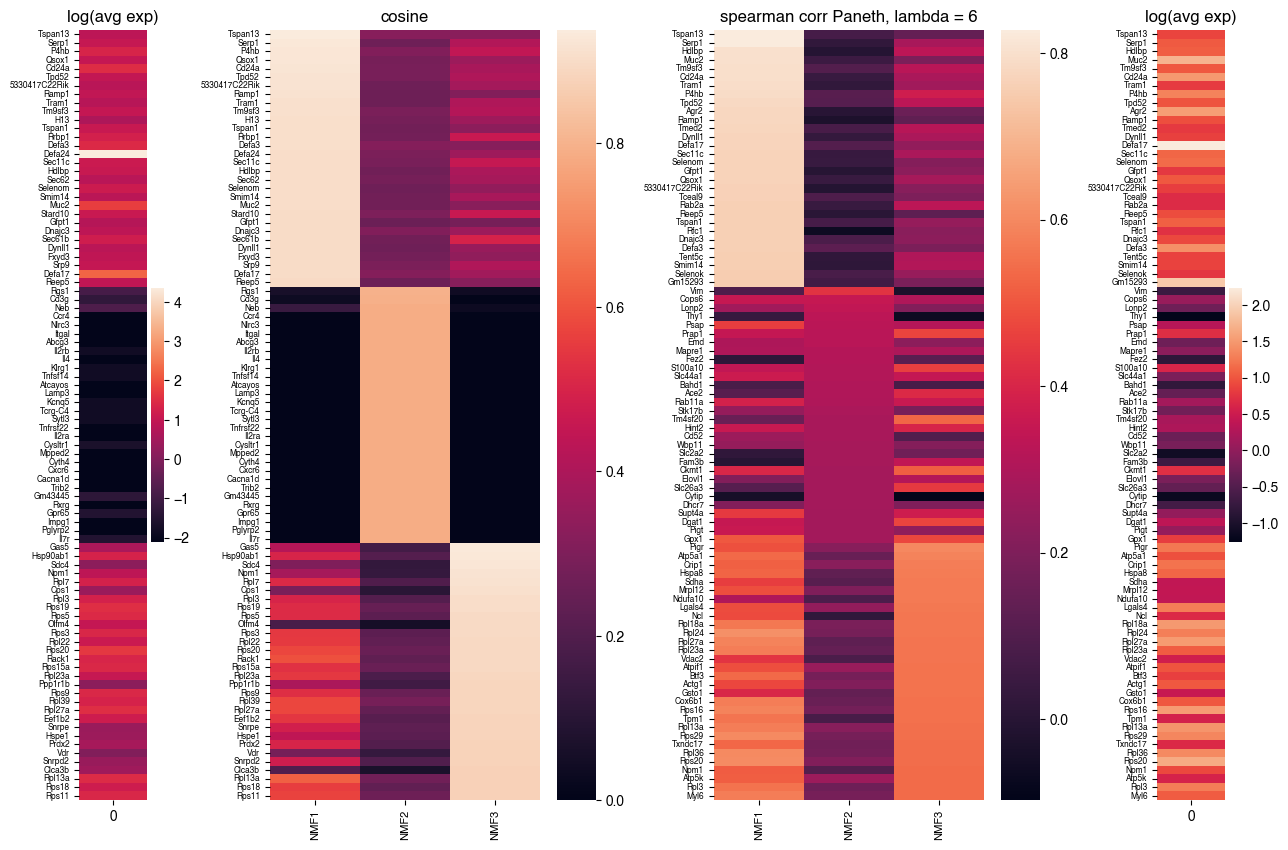

In [23]:
# Visualize the cosine similarity and Spearman correlation between genes and latent factors 
# This function generates output for the top 30 genes based on cosine similarity (left) or Spearman correlation (right) 

# Select cell types by adding IDs to list argument choose_celltypes, or leave empty for generating output for all cell types

scov.plot_cosine_and_spearman_correlation_to_factors(all_output_data,choose_celltypes=['Paneth'],NOG_Fa=30)

The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/dotplots/Factors_Stem_TA.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


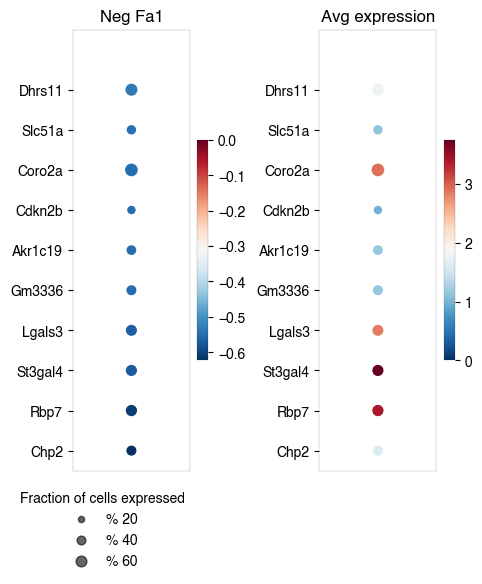

In [24]:
# Call this function to visualize correlation and expression of genes associated with factors

# For example, visualize and extract the top 10 genes (top_NOG=10)
# correlating negatively (positively_correlated=False)
# by Spearman correlation (correlation_with_spearman=True)
# for cell type Stem/TA (choose_celltype='Stem/TA')
# in factor 1 (choose_factor_id=1)

dataframe=scov.extract_and_plot_top_genes_from_chosen_factor_in_celltype(all_output_data,choose_celltype='Stem/TA',
choose_factor_id=1,top_NOG=10,correlation_with_spearman=True,positively_correlated=False)

In [25]:
# inspect the top genes in the given factor as in table
# proportion_of_population_expressed: proportion of cells expressing a gene in the respective cluster 

dataframe

,Gene,Fa,mean_expression,proportion_of_population_expressed
0,Chp2,-0.622901,1.619048,0.388095
1,Rbp7,-0.606304,3.402381,0.504762
2,St3gal4,-0.573397,3.750000,0.492857
3,Lgals3,-0.567029,2.847619,0.480952
4,Gm3336,-0.553340,1.152381,0.383333
5,Akr1c19,-0.550032,1.142857,0.359524
6,Cdkn2b,-0.549676,0.973810,0.257143
7,Coro2a,-0.547747,2.904762,0.657143
8,Slc51a,-0.546171,1.123810,0.333333
9,Dhrs11,-0.532496,1.773810,0.585714


In [26]:
# Save data in an Excel sheet for each cell type, including latent factor associations of all genes according to 
# Spearman correlation and cosine similarity. 

scov.make_excel_sheet_for_gene_correlation(all_output_data)

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


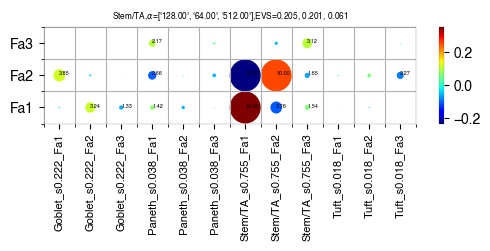

In [27]:
# Plot covariations between niche cell types (x-axis) and central cell type (y-axis, defined by list argument choose_celltypes). 
# Circle size scales with -log10 p-value (indicated as number on top of each circle). 
# To generate plots for all cell types, leave list argument choose_celltypes empty. 

choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(all_output_data,choose_celltypes=choose_celltypes)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


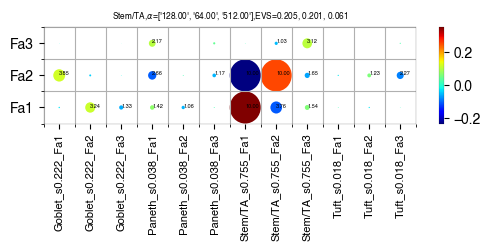

In [28]:
# Plot covariations between niche cell types (x-axis) and central cell type (y-axis, defined by list argument choose_celltypes).
# Circle size scales with -log10 p-value (indicated as number on top of each circle).
# In this example, a p-value cutoff is explicitely defined by the pvalue_cutoff argument.

choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(all_output_data,
            choose_celltypes=choose_celltypes,pvalue_cutoff=0.1,mention_pvalue=True)


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


cell types found  ['Stem/TA']
The regression figures as pvalue circle plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_circleplot_*


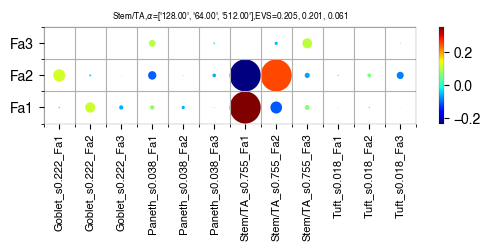

In [29]:
# Plot covariations between niche cell types (x-axis) and central cell type (y-axis, defined by list argument choose_celltypes).
# Circle size scales with -log10 p-value. In this example, the -log10 p-value is not shown as number.

choose_celltypes=['Stem/TA']
scov.plot_significant_regression_covariations_as_circleplot(all_output_data,
            choose_celltypes=choose_celltypes,pvalue_cutoff=0.05,mention_pvalue=False)

cell types found  ['Stem/TA']
The regression figures as pvalue heatmap plots are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_outputs/pvalue_coeff_heatmap_*


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


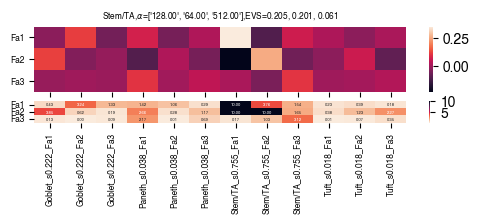

In [30]:
# Plot covariations between niche cell types (x-axis) and central cell type (y-axis, defined by list argument choose_celltypes) as heatmap.
# Leave list argument choose_celltypes empty to generate plots for all cell types.
# The top subfigure shows the coefficient and bottom subfigure shows the -log10 p-value. 

scov.plot_significant_regression_covariations_as_heatmap(all_output_data,
    choose_celltypes=['Stem/TA'],saveas='pdf',transparent_mode='False',figsize=(6,1.25))


In [31]:
# Save all ligand-receptor interactions infered for the niche of each cell type niche in an Excel sheet,  
# and a summary of significant niche interactions in a text file. 

scov.save_LR_interactions_in_excelsheet_and_regression_summary_in_textfile_for_interacting_cell_types(all_output_data,
pvalueCutoff=0.05,correlation_with_spearman=True,
LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2,number_of_top_genes_to_print=5)


The Excel sheet is saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/Lig_and_Rec_enrichment_in_interacting_celltypes.xlsx
The text file is saved: ./spatial_ct_ct_interactions/covariations_R0_F3/Regression_summary.txt


# Generate visualizations of ligand-receptor interactions within the niche

LR figures for both ways are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_nc_vs_cc/


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

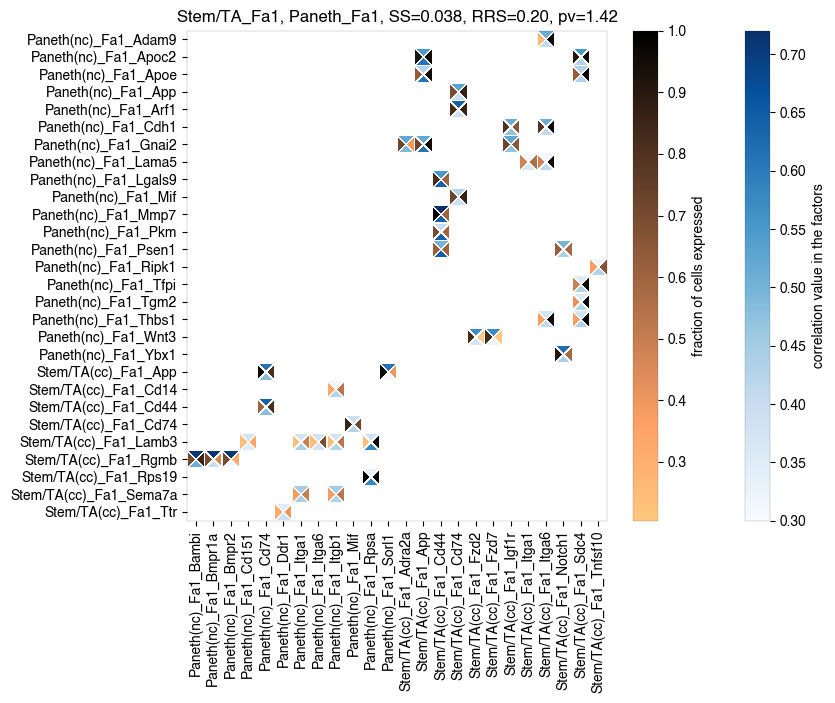

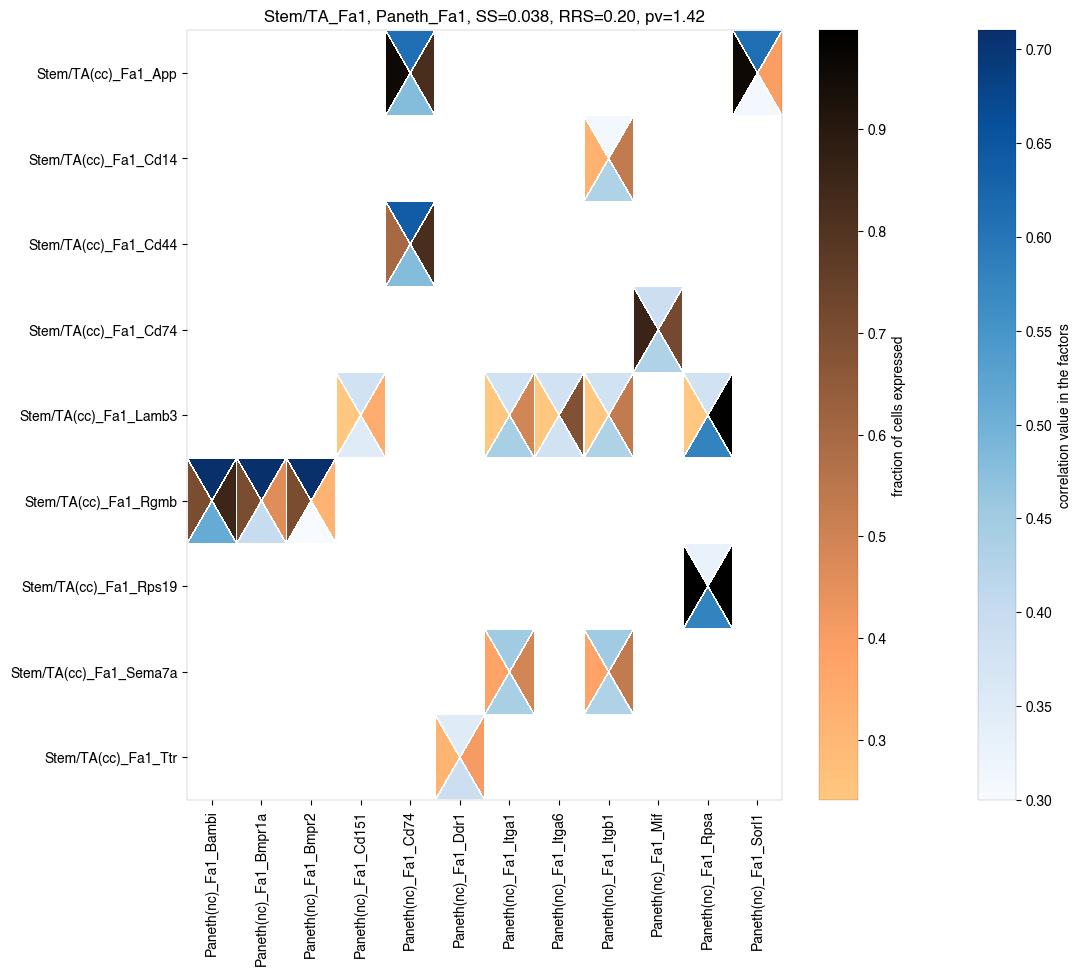

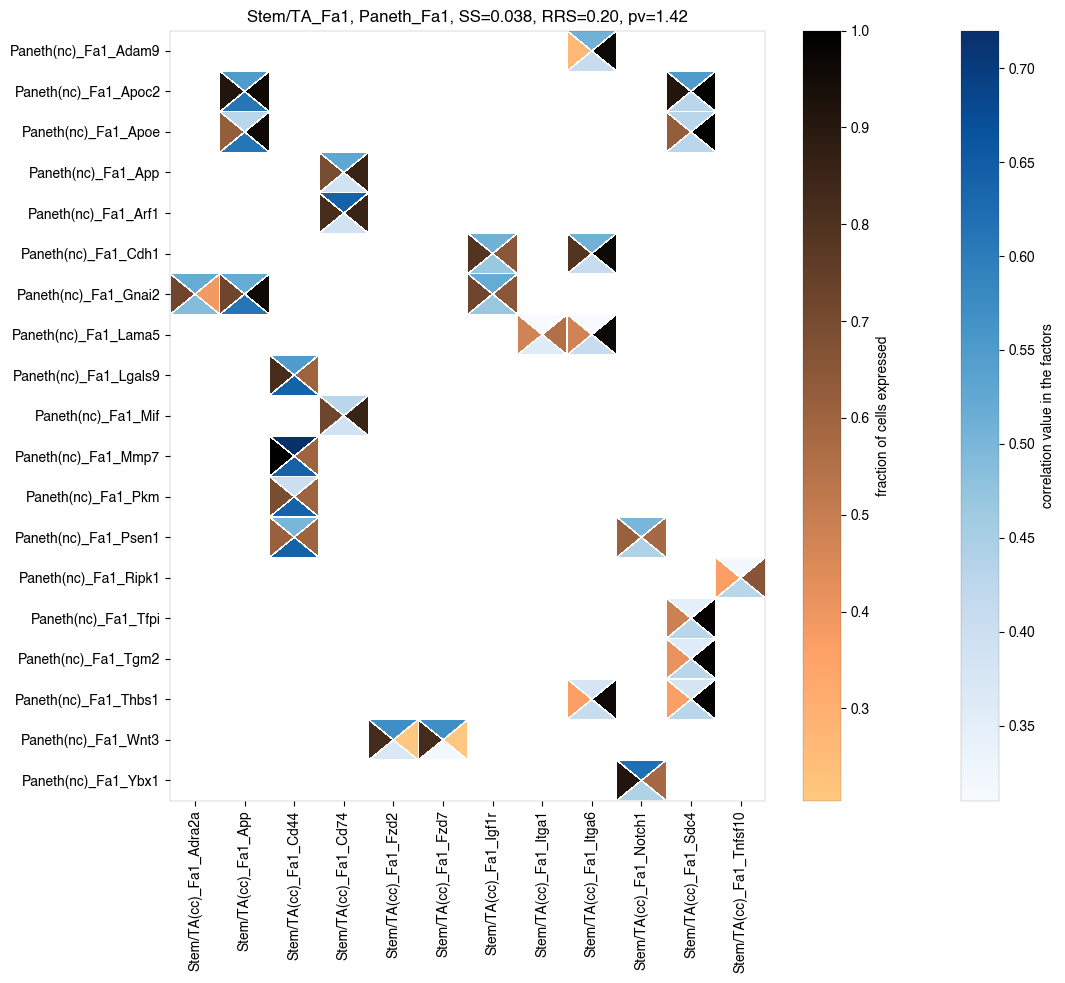

In [32]:
# Perform ligand-receptors analysis
# In this example, output is generated for the ligand-receptor pairs associated with the intercting 
# factor 1 of Stem/TA cells and factor 1 of Paneth cells. 

# choose_interacting_celltype_pair=['Stem/TA','Paneth'] 
# choose_factors_id=[1,1] entries correspond to cell types in choose_interacting_celltype_pai, i.e., 
# first factor ID corresponds to Stem/TA and second factor ID corresponds to Paneth

# By default, the analysis is saved in 3 separate figures (bidirectional, CC to NC and NC to CC). 
# CC: central cell 
# NC: niche cell 

# Our analysis accounts for bidirectional cellular crosstalk interactions of ligands and receptors in cell types A and B.
# The ligand can be expressed on cell type A and signal to the receptor detected on cell type B, or vice versa.

# By changing the cutoff for minimum factor correlation of ligand/receptor genes (LR_plot_NMF_Fa_thres=0.2) 
# or the cutoff for the minimum fraction of cells expressing the ligand/receptor genes (LR_plot_Exp_thres=0.2) the 
# stringency of the output filtering can be controled. 


choose_celltypes=['Stem/TA']
scov.find_LR_interactions_in_interacting_cell_types(all_output_data,
choose_interacting_celltype_pair=['Stem/TA','Paneth'],choose_factors_id=[1,1],pvalueCutoff=0.05,
    LR_plot_NMF_Fa_thres=0.3,LR_plot_Exp_thres=0.2)

LR figures for both ways are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche/
LR figures for CC to NC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_cc_vs_nc/
LR figures for NC to CC are saved in following path  ./spatial_ct_ct_interactions/covariations_R0_F3/Plot_ligand_receptor_in_niche_nc_vs_cc/


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped
1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

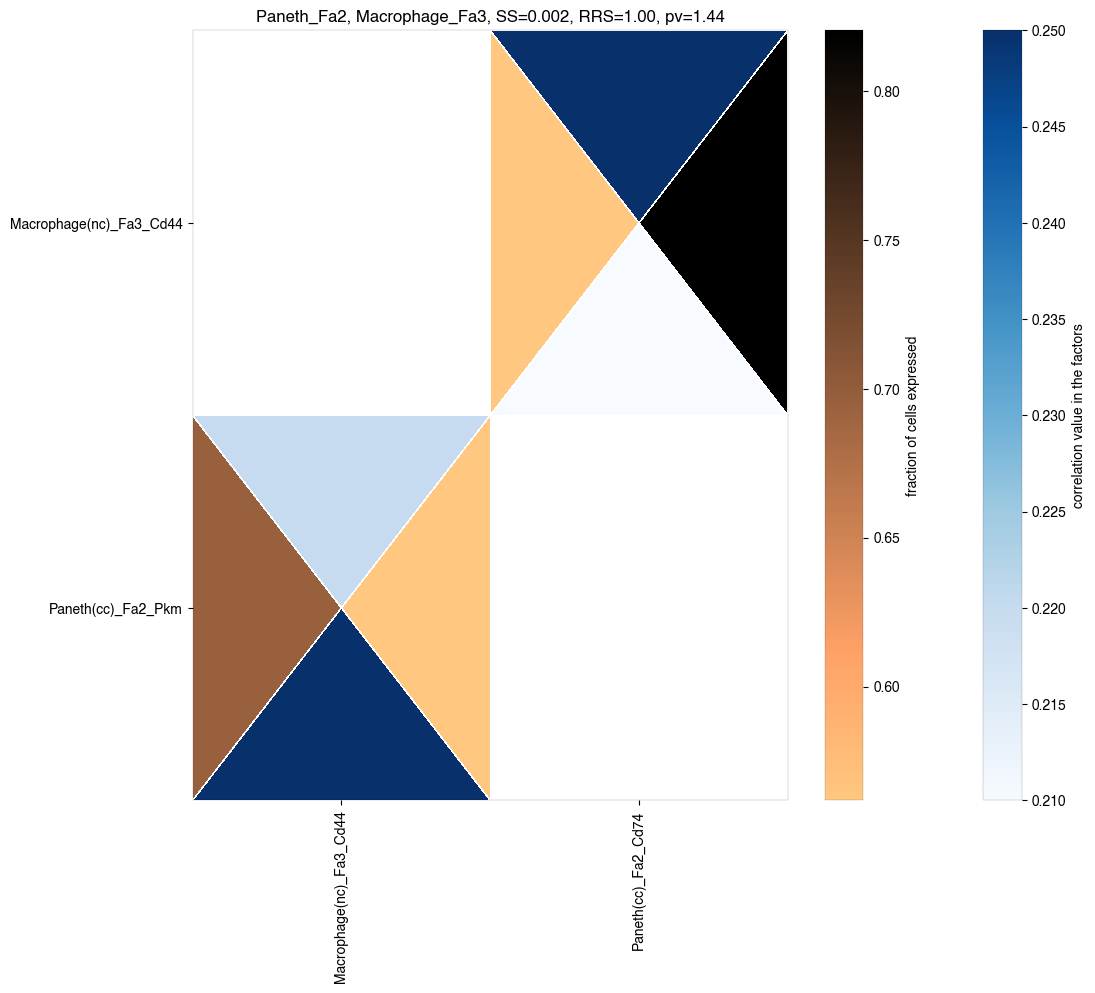

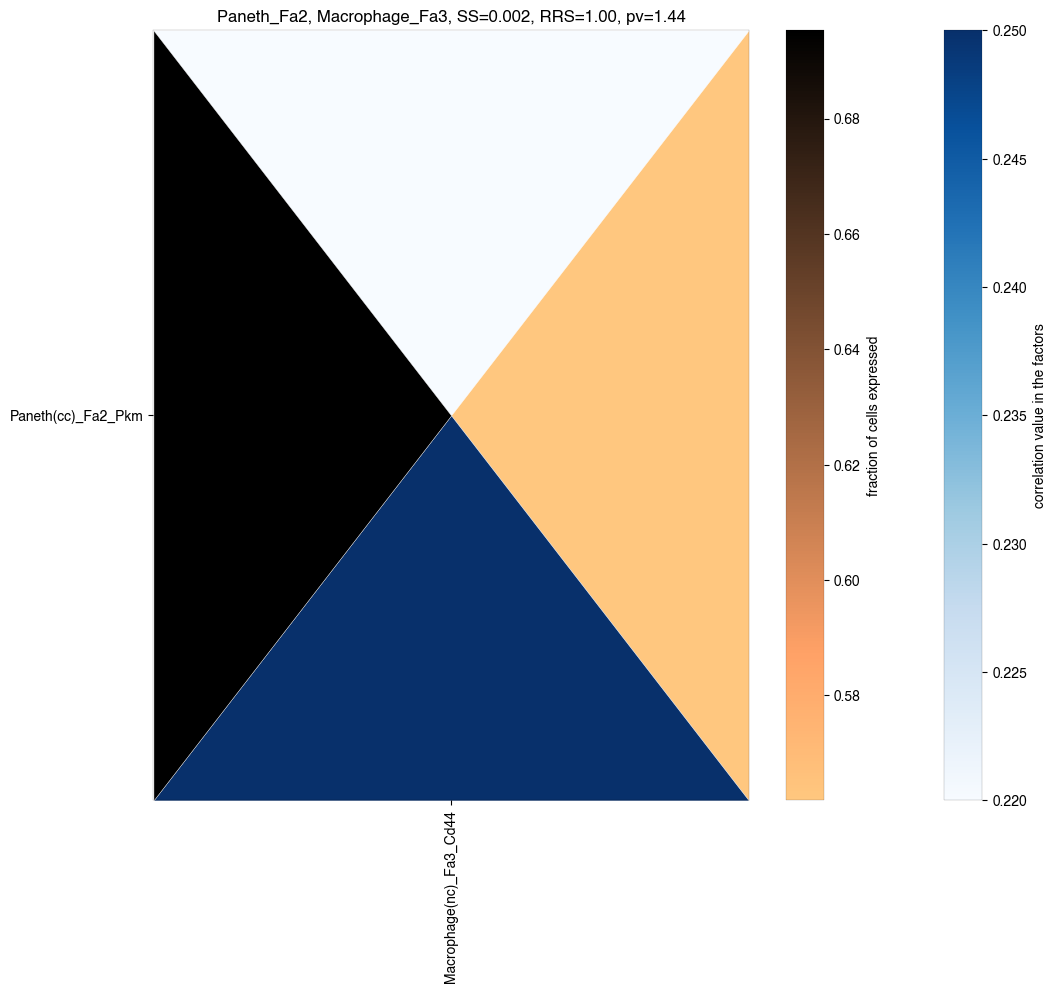

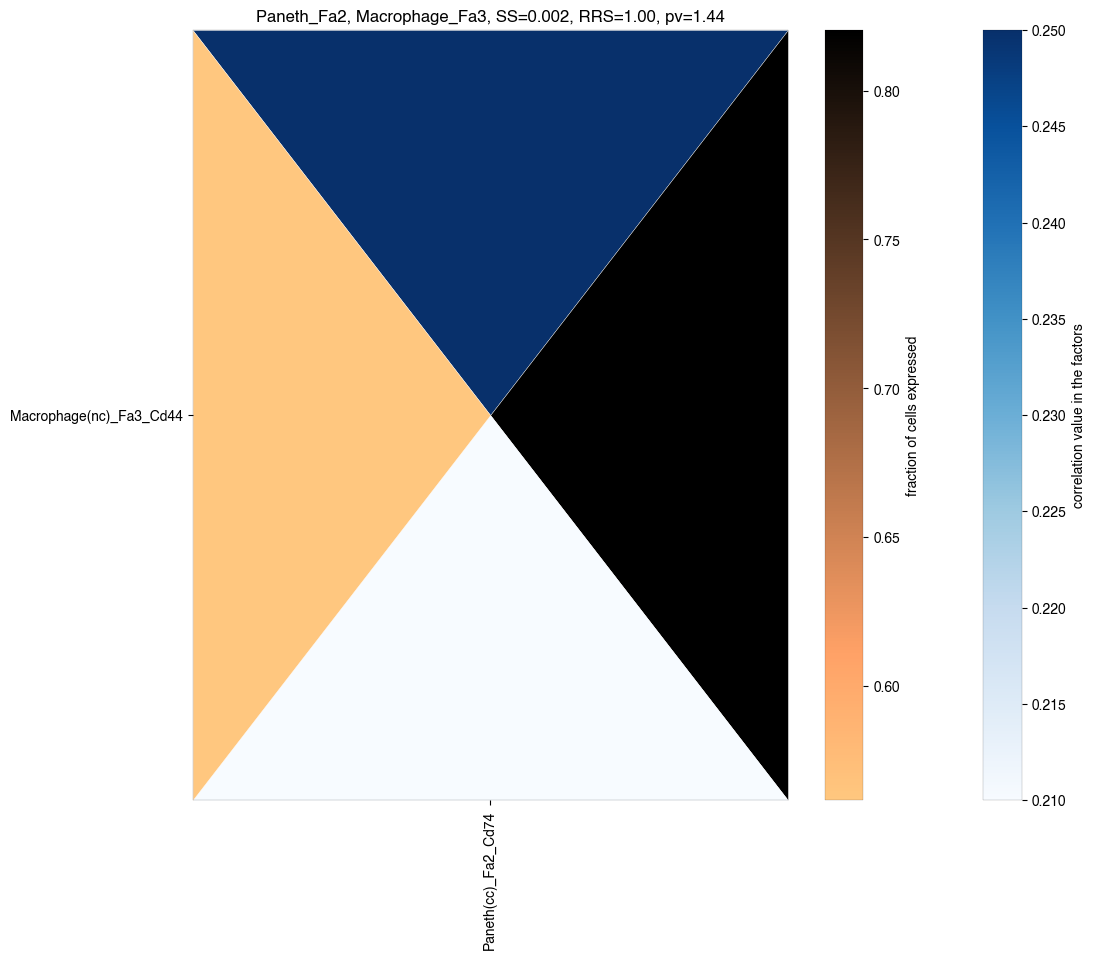

In [33]:
# Perform ligand-receptors analysis of the Paneth cell niche including all significant interaction partners. 
# choose_interacting_celltype_pair=['Paneth']   generate plots for all cell types interacting sigificantly with Paneth cells 
# choose_factors_id=[]  if empty, generate plots for all significantly covarying factors

scov.find_LR_interactions_in_interacting_cell_types(all_output_data,choose_interacting_celltype_pair=['Paneth'],
    choose_factors_id=[], LR_plot_NMF_Fa_thres=0.2,LR_plot_Exp_thres=0.2)


# Perform functional enrichment analysis for genes associated with latent factors 

The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


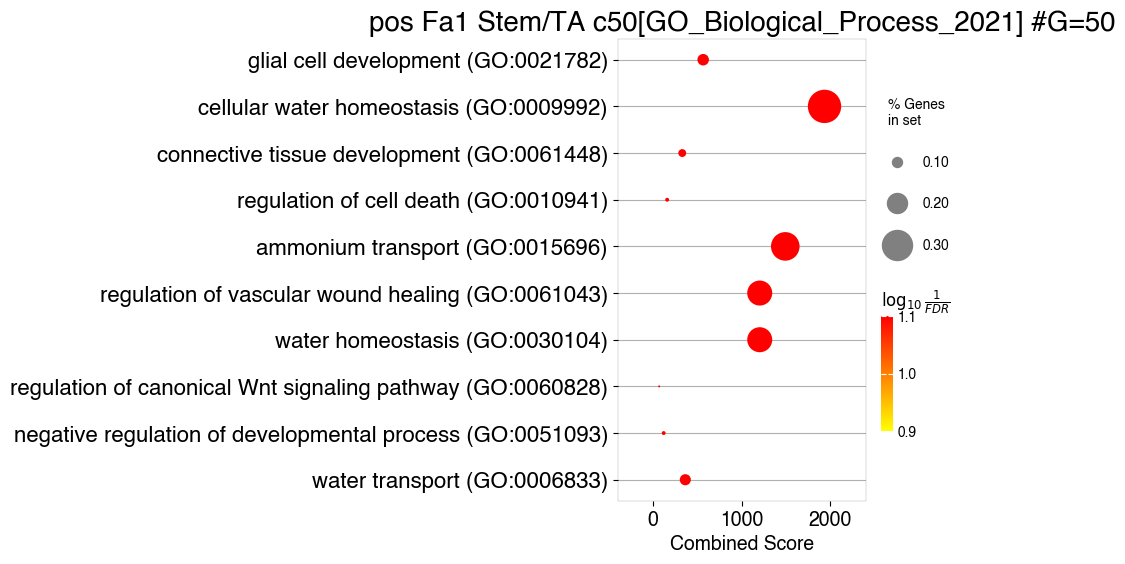

In [34]:
# Perform pathway enrichment analysis for factor-associated genes

# In this example, pathway analysis is performed for top 50 (NOG_pathway=50) genes, 
# positively correlated (positively_correlated=True) 
# with factor 1 (choose_factors_id=[1])
# of Stem/TA cells (choose_celltypes=['Stem/TA'])
# testing for enrichment of GO Biological Processes (database=['GO_Biological_Process_2021']).

# If savefigure=True, then the figures will be saved in the respective folder. 

scov.pathway_analysis(all_output_data,choose_celltypes=['Stem/TA'],
NOG_pathway=50,choose_factors_id=[1],
positively_correlated=True,savefigure=False,database=['GO_Biological_Process_2021'])

The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Stem/TA']


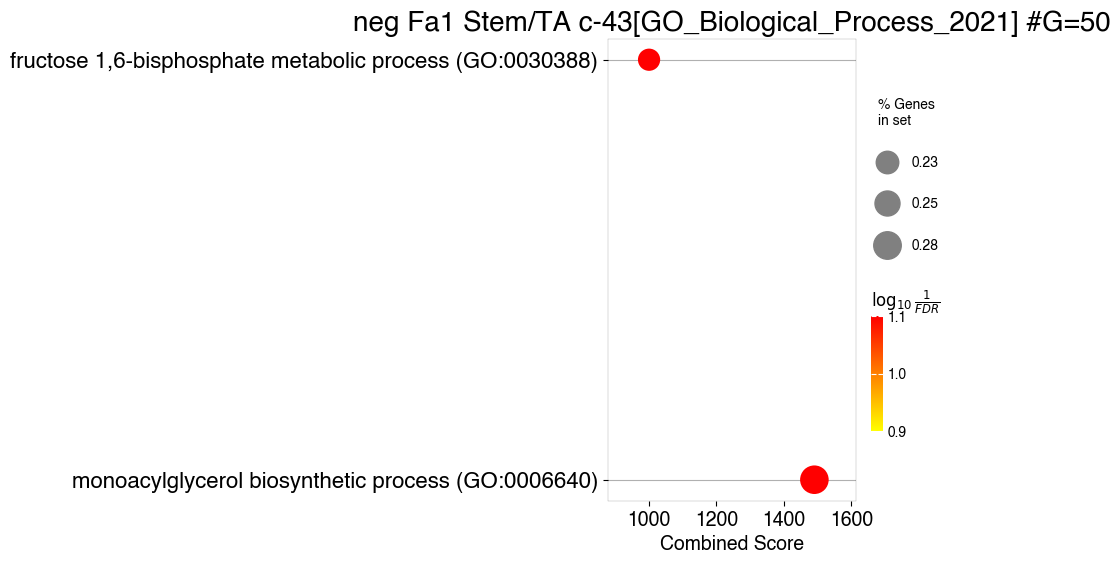

In [35]:
# In this example, pathway analysis is performed for top 50 (NOG_pathway=50) genes, 
# negatively correlated (positively_correlated=False) 
# with factor 1 (choose_factors_id=[1])
# of Stem/TA cells (choose_celltypes=['Stem/TA'])
# testing for enrichment of GO Biological Processes (database=['GO_Biological_Process_2021']).

# If savefigure=True, then the figures will be saved in the respective folder. 

scov.pathway_analysis(all_output_data,choose_celltypes=['Stem/TA'],
NOG_pathway=50,choose_factors_id=[1],
positively_correlated=False,savefigure=False,database=['GO_Biological_Process_2021'])

In [36]:
# In this example, pathway analyses are performed for top 50 (NOG_pathway=50) genes, 
# positively correlated (positively_correlated=True) 
# with any factor (choose_factors_id=[1])
# of Paneth cells (choose_celltypes=['Paneth'])
# testing for enrichment of pathways from three databases (GO_Biological_Process_2021','BioPlanet_2019','Reactome_2016').


#scov.pathway_analysis(all_output_data,choose_celltypes=['Paneth'],NOG_pathway=50,choose_factors_id=[],
#                      positively_correlated=True,savefigure=False,database=[])


The pathway figures are saved in  ./spatial_ct_ct_interactions/covariations_R0_F3/Pathway_figures/
cell types found  ['Goblet']


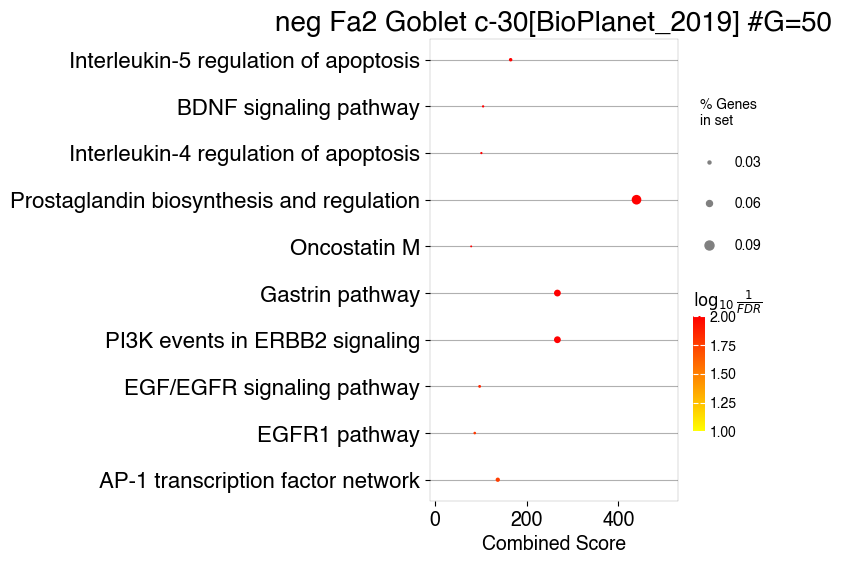

In [38]:
# In this example, pathway analysis is performed for top 50 (NOG_pathway=50) genes, 
# negatively correlated (positively_correlated=False) 
# with factor 2 (choose_factors_id=[2])
# of Goblet cells (choose_celltypes=['Goblet'])
# testing for enrichment of BioPlanet pathways (database=['BioPlanet_2019']).

# If savefigure=True, then the figures will be saved in the respective folder. 



scov.pathway_analysis(all_output_data,choose_celltypes=['Goblet'],NOG_pathway=50,choose_factors_id=[2],
                      positively_correlated=False,savefigure=False,database=['BioPlanet_2019'])

cell types found  ['Paneth']
The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/dotplots/Paneth.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


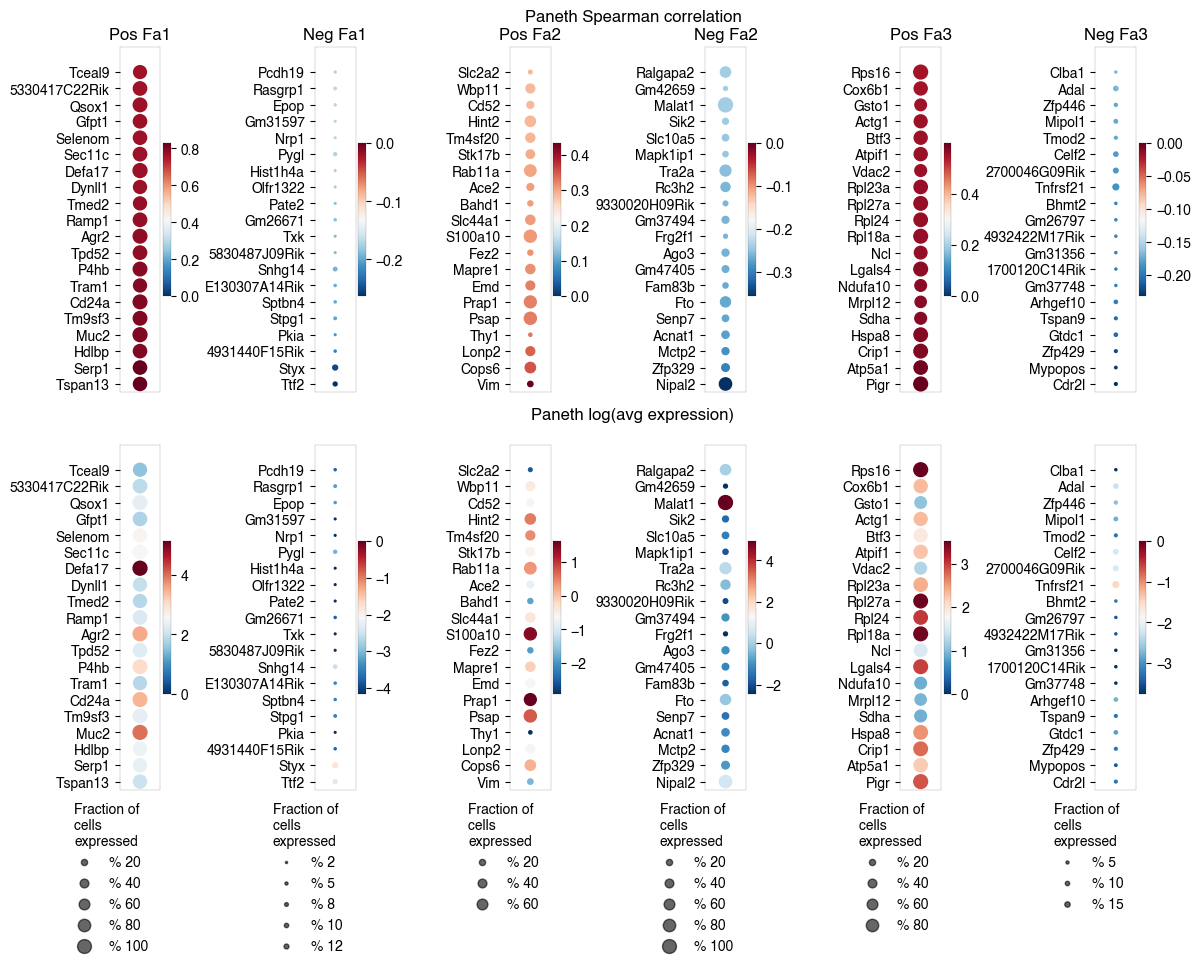

In [39]:
# Show the top 20 positively and negatively correlated genes (top_NOG=20) for all latent factors and
# the average expression of these genes on a log scale in a single plot. 
# In this example, plots are generated for Paneth cells. 

# If the choose_celltypes=[], the plot will be generated for all cell types. 

scov.plot_top_selected_genes_for_all_factors_from_chosen_celltype(all_output_data,choose_celltypes=['Paneth'])

# Visualize factor values in the UMAP

1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped


The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/scRNAseq_factors_in_umap.pdf


feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

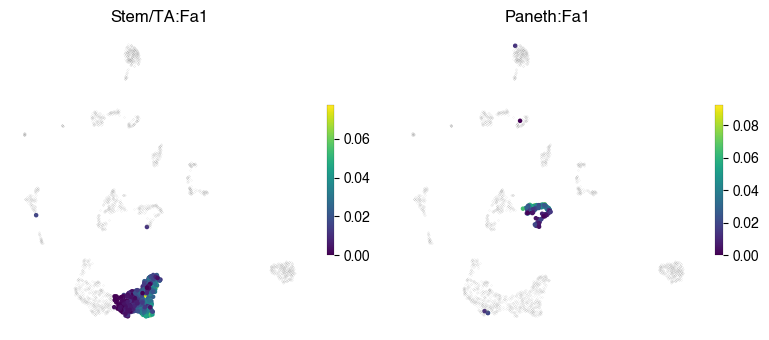

In [40]:
# Visualize factor values for select cell types, e.g., Stem/TA and Paneth cells (choose_interacting_celltype_pair=['Stem/TA','Paneth']) in scRNA-seq data umap.
# Select factors for each cell type (visualize_factors_id=[1,1]). List entries correspond to cell types in choose_interacting_celltype_pair.

scov.visualize_factors_in_scRNAseq_umap(all_output_data,choose_interacting_celltype_pair=['Stem/TA','Paneth'],visualize_factors_id=[1,1])


The figures are saved:  ./spatial_ct_ct_interactions/covariations_R0_F3/spatial_factors_in_umap.pdf


1 extra bytes in post.stringData array
'created' timestamp seems very low; regarding as unix timestamp
Zapf NOT subset; don't know how to subset; dropped
feat NOT subset; don't know how to subset; dropped
morx NOT subset; don't know how to subset; dropped


0

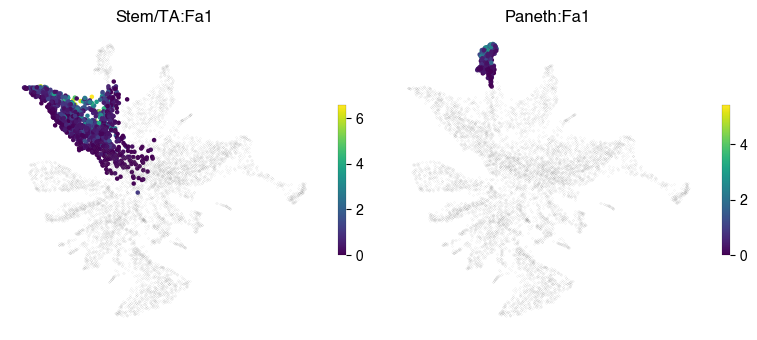

In [41]:
# Visualize factor values for select cell types, e.g., Stem/TA and Paneth cells (choose_interacting_celltype_pair=['Stem/TA','Paneth']) in spatial transcriptomics data umap.
# Select factors for each cell type (visualize_factors_id=[1,1]). List entries correspond to cell types in choose_interacting_celltype_pair.


scov.visualize_factors_in_spatial_umap(all_output_data,choose_interacting_celltype_pair=['Stem/TA','Paneth'],visualize_factors_id=[1,1])
